In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\TESS_catalogue_revised.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_21820\3915017766.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\TESS_catalogue_revised.csv")


In [3]:
df.loc[11]

Unnamed: 0.1                               11
Unnamed: 0                                 11
TIC ID                          TIC 385751622
Teff                              4168.920000
logg                                 4.230000
Flare #                                     4
Observation time                    87.000167
Average flare duration               0.114582
Longest flare duration               0.166666
Shortest flare duration              0.083333
Average percentage increase     705447.241292
Highest percentage increase     811441.659870
Lowest percentage increase      598289.364226
Name: 11, dtype: object

In [20]:
flc = from_mast("TIC 385751622", mode="LC", mission="TESS")

9% (89/993) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
9% (89/993) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1% (12/993) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
1% (12/993) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


In [21]:
flc = flc[1]

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

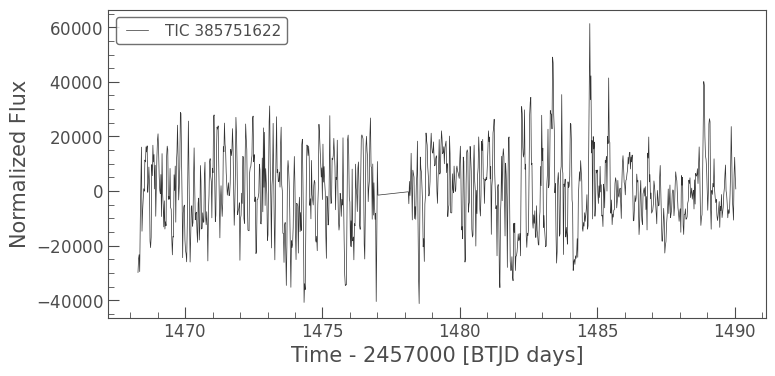

In [22]:
flc.plot()

In [23]:
flc = flc.detrend("savgol")

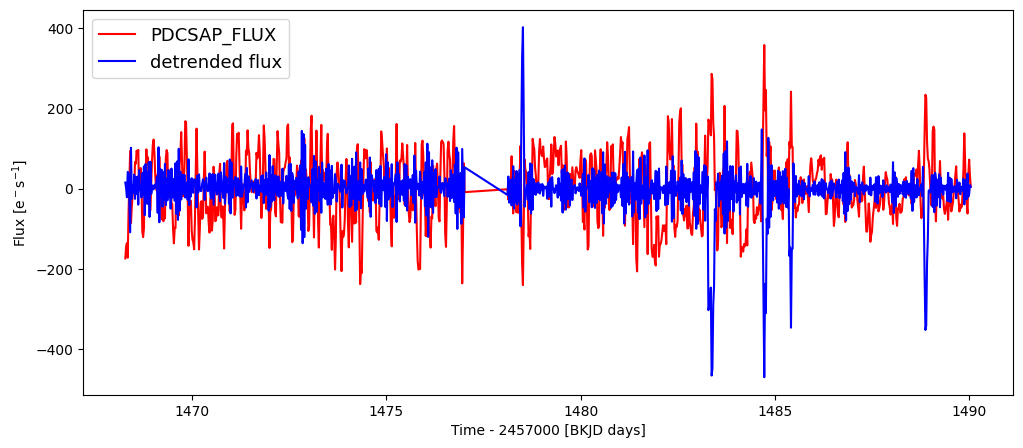

In [28]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
#plt.xlim(2614, 2615)
#plt.ylim(.95,1.25)
plt.legend(loc=2,fontsize=13);

In [26]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,664,672,12279,12287,1483.287448,1483.454113,80191702.17949584,1801997.4421019056,8042.136253695053,0.166666,987.000000
1,731,735,12347,12351,1484.704103,1484.787436,40208990.821225405,1277641.5197125764,8114.416598704304,0.083333,987.000000
2,763,768,12379,12384,1485.370763,1485.474929,29905250.68448709,1370646.2006275097,5982.893642259511,0.104165,987.000000
3,929,934,12546,12551,1488.849875,1488.954040,37980005.544235066,1413470.5386374926,6078.443157040807,0.104165,987.000000


In [25]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,417) gap.
Found 4 candidate(s) in the (417,987) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
